In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 


# Read the barcode counts from the file
# Make sure the file has two columns: count and barcode
df = pd.read_csv('white_list.txt', delim_whitespace=True, header=None, names=['Count', 'Barcode'])

# Sort the DataFrame by Count in descending order
df_sorted = df.sort_values(by='Count', ascending=True)

# calculate cumulative sum and cumulative distribution
df_sorted['cdf'] = np.cumsum(df_sorted['Count']) / np.sum(df_sorted['Count'])
df_sorted

C:\Users\merai\AppData\Local\Temp\ipykernel_23904\1704536660.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('white_list.txt', delim_whitespace=True, header=None, names=['Count', 'Barcode'])


,Count,Barcode,cdf
5045592,1,NTTTTTGTGTCAAATACGC,1.228048e-09
5045595,1,NTTTTTGTGTCAACCCTTG,2.456097e-09
5045596,1,NTTTTTGTGTCAACCTGAC,3.684145e-09
5045580,1,NTTTTGGACTTGCAAAGCC,4.912193e-09
5045581,1,NTTTTGTCGCCGTTACCGC,6.140241e-09
...,...,...,...
616299,1005379,NGACTTACTCCAAAGCCTA,9.935726e-01
2949772,1096459,NNNAAATCAGAAGTGATGC,9.949191e-01
90309,1171244,NGAAAGATTGTTCCGTCCA,9.963574e-01
4511405,1428471,NNNTCCAGGGACTGGTGCA,9.981117e-01


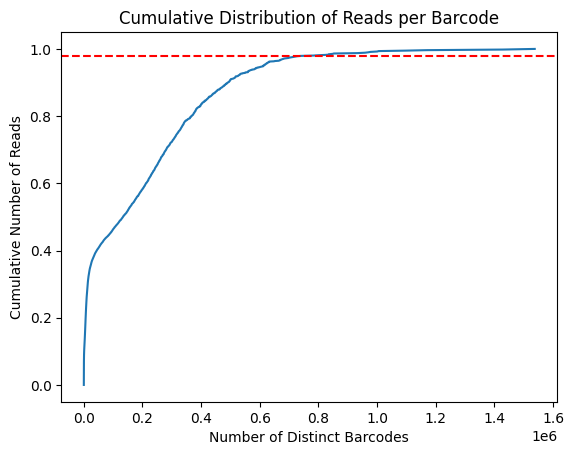

In [25]:
import matplotlib.pyplot as plt

# Plot the CDF
plt.plot(df_sorted['Count'], df_sorted['cdf'])

# Add labels and title
plt.xlabel('Number of Distinct Barcodes')
plt.ylabel('Cumulative Number of Reads')
plt.title("Cumulative Distribution of Reads per Barcode")
plt.axhline(y=0.98, color='red', linestyle='--', label='0.9 Threshold')
plt.show()
# want to omit reads with barcodes that are too infrequent, 0.98% of reads with distinct barcodes cut-off .. too stringent? 

In [38]:
df_sorted[df_sorted['cdf'] > 0.98].to_csv("WL_BC.txt") 
df_sorted[df_sorted['cdf'] > 0.98][['Barcode']].to_csv("WL_just_BC.txt", index=False) 

In [5]:
import pandas as pd

# Load the GTF file
gtf_file = "gencode.v47.annotation.gtf.gz" 
output_file = "tg_map.tsv"

# Read the GTF file
data = pd.read_csv(gtf_file, sep='\t', comment='#', header=None)
# Extract transcript and gene IDs
transcripts = data[data[2] == 'transcript']
transcripts['transcript_id'] = transcripts[8].str.extract(r'transcript_id "([^"]+)"')[0]
transcripts['gene_id'] = transcripts[8].str.extract(r'gene_id "([^"]+)"')[0]

# Keep unique pairs and save to file
transcript_gene_map = transcripts[['transcript_id', 'gene_id']].drop_duplicates()
transcript_gene_map.to_csv(output_file, sep='\t', index=False, header=False)

C:\Users\merai\AppData\Local\Temp\ipykernel_2496\545826402.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transcripts['transcript_id'] = transcripts[8].str.extract(r'transcript_id "([^"]+)"')[0]
C:\Users\merai\AppData\Local\Temp\ipykernel_2496\545826402.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transcripts['gene_id'] = transcripts[8].str.extract(r'gene_id "([^"]+)"')[0]
